In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def Get_weighted_average(value,error):
    sum_mean = 0
    sum_sigma = 0
    #print(value,error)
    for i in range(len(value)):
        #print(i,value[i],error[i])
        sum_mean += value[i]/(error[i]*error[i])
        sum_sigma += 1/(error[i]*error[i])
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
def Get_average(value1,error1,value2,error2):
    sum_mean = value1/error1**2+value2/error2**2
    sum_sigma = 1/error1**2+1/error2**2
    return sum_mean/sum_sigma,math.sqrt(1/sum_sigma)
#def Get_ratio_error(value1,error1,value2,error2):
#    return value1/value2,(value1/value2)*math.sqrt((error1/value1)**2+(error2/value2)**2)
#this is actually same method
def Get_ratio_error(value1,error1,valuem,errorm):
    return abs(value1-valuem)/valuem,math.sqrt(error1**2+errorm**2)/valuem

In [3]:
df_xs_kT8_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/simenhancedNpip_kT=0.804GeV.dat',delim_whitespace=True)
df_xs_kT8_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.092336,-2.837154,0.625728,0.322330,1.189030,0.159026,FUUT,0.181298,0.000445,0.0,0.0,neutron,pi+,solid,0.000445
1,1,11.0,0.117905,-2.829656,0.549280,0.323253,1.332693,0.138481,FUUT,0.167449,0.000446,0.0,0.0,neutron,pi+,solid,0.000446
2,2,11.0,0.146698,-2.819605,0.468728,0.324132,1.412858,0.115015,FUUT,0.165157,0.000630,0.0,0.0,neutron,pi+,solid,0.000630
3,3,11.0,0.100572,-2.235519,0.592669,0.322548,1.225438,0.157763,FUUT,0.178410,0.000446,0.0,0.0,neutron,pi+,solid,0.000446
4,4,11.0,0.133842,-2.200449,0.501067,0.323351,1.376902,0.134203,FUUT,0.165217,0.000445,0.0,0.0,neutron,pi+,solid,0.000445


In [4]:
df_xs_kT4_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/simenhancedNpip_kT=0.404GeV.dat',delim_whitespace=True)
df_xs_kT4_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.089951,-2.838515,0.631022,0.322419,1.168826,0.160646,FUUT,0.184163,0.000444,0.0,0.0,neutron,pi+,solid,0.000444
1,1,11.0,0.110701,-2.830511,0.573350,0.323378,1.307896,0.142646,FUUT,0.168190,0.000448,0.0,0.0,neutron,pi+,solid,0.000448
2,2,11.0,0.135704,-2.823800,0.496652,0.323888,1.385438,0.125963,FUUT,0.165526,0.000445,0.0,0.0,neutron,pi+,solid,0.000445
3,3,11.0,0.170189,-2.812747,0.415303,0.324682,1.456716,0.076163,FUUT,0.167753,0.001587,0.0,0.0,neutron,pi+,solid,0.001587
4,4,11.0,0.097743,-2.240322,0.599704,0.322490,1.206434,0.160094,FUUT,0.180834,0.000448,0.0,0.0,neutron,pi+,solid,0.000448


In [5]:
df_xs_kT6_zQ2xbjPhT = pd.read_csv('../Unpol_proposal/Materials/simenhanced_1xs.dat',delim_whitespace=True)
df_xs_kT6_zQ2xbjPhT.head()

,i,Ebeam,x,phih,y,z,Q2,pT,obs,value,stat,systrel,systabs,target,hadron,Experiment,error
0,0,11.0,0.096472,-2.836357,0.614065,0.322670,1.216999,0.155182,FUUT,0.177679,0.000445,0.0,0.0,neutron,pi+,solid,0.000445
1,1,11.0,0.132718,-2.826124,0.506522,0.323708,1.375384,0.126761,FUUT,0.165628,0.000474,0.0,0.0,neutron,pi+,solid,0.000474
2,2,11.0,0.105780,-2.227944,0.578290,0.322748,1.254335,0.152854,FUUT,0.175346,0.000445,0.0,0.0,neutron,pi+,solid,0.000445
3,3,11.0,0.145042,-2.191027,0.472163,0.323749,1.404268,0.126987,FUUT,0.164009,0.000576,0.0,0.0,neutron,pi+,solid,0.000576
4,4,11.0,0.134333,-1.539575,0.494297,0.323116,1.354022,0.140201,FUUT,0.168347,0.000448,0.0,0.0,neutron,pi+,solid,0.000448


In [6]:
PI = math.pi
print(PI)
z_cuts=[0.3,0.4,0.5,0.6]
#z_cuts=[0.3,0.35,0.4,0.45]
#Q2_cuts=[1,2,3,4,5]
Q2_cuts=[1,1.5,2,2.5,3]
xbj_cuts=[0,0.7]
PhT_cuts = [0,0.4]
#PhT_cuts = [0.2,0.4]
#PhT_cuts=[0.2,0.6]
#PhT_cuts=[0.2,0.4]
#phih_bins = [-3.14,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3.14]
phih_bins =[-PI,-4*PI/5,-3*PI/5,-2*PI/5,-PI/5,PI/5,2*PI/5,3*PI/5,4*PI/5,PI]
#phih_bins =[-PI,-0.9*PI,-0.8*PI,-0.7*PI,-0.6*PI,-0.5*PI,-0.4*PI,-0.3*PI,-0.2*PI,-0.1*PI,0,0.1*PI,0.2*PI,0.3*PI,0.4*PI,0.5*PI,0.6*PI,0.7*PI,0.8*PI,0.9*PI,PI]
df_xs_kT8_zQ2=df_xs_kT8_zQ2xbjPhT[df_xs_kT8_zQ2xbjPhT['x']>xbj_cuts[0]][df_xs_kT8_zQ2xbjPhT['x']<xbj_cuts[1]][df_xs_kT8_zQ2xbjPhT['pT']>PhT_cuts[0]][df_xs_kT8_zQ2xbjPhT['pT']<PhT_cuts[1]]
df_xs_kT4_zQ2=df_xs_kT4_zQ2xbjPhT[df_xs_kT4_zQ2xbjPhT['x']>xbj_cuts[0]][df_xs_kT4_zQ2xbjPhT['x']<xbj_cuts[1]][df_xs_kT4_zQ2xbjPhT['pT']>PhT_cuts[0]][df_xs_kT4_zQ2xbjPhT['pT']<PhT_cuts[1]]
df_xs_kT6_zQ2=df_xs_kT6_zQ2xbjPhT[df_xs_kT6_zQ2xbjPhT['x']>xbj_cuts[0]][df_xs_kT6_zQ2xbjPhT['x']<xbj_cuts[1]][df_xs_kT6_zQ2xbjPhT['pT']>PhT_cuts[0]][df_xs_kT6_zQ2xbjPhT['pT']<PhT_cuts[1]]

3.141592653589793


<ipython-input-6-078b8b5e38ea>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8_zQ2=df_xs_kT8_zQ2xbjPhT[df_xs_kT8_zQ2xbjPhT['x']>xbj_cuts[0]][df_xs_kT8_zQ2xbjPhT['x']<xbj_cuts[1]][df_xs_kT8_zQ2xbjPhT['pT']>PhT_cuts[0]][df_xs_kT8_zQ2xbjPhT['pT']<PhT_cuts[1]]
<ipython-input-6-078b8b5e38ea>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8_zQ2=df_xs_kT8_zQ2xbjPhT[df_xs_kT8_zQ2xbjPhT['x']>xbj_cuts[0]][df_xs_kT8_zQ2xbjPhT['x']<xbj_cuts[1]][df_xs_kT8_zQ2xbjPhT['pT']>PhT_cuts[0]][df_xs_kT8_zQ2xbjPhT['pT']<PhT_cuts[1]]
<ipython-input-6-078b8b5e38ea>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8_zQ2=df_xs_kT8_zQ2xbjPhT[df_xs_kT8_zQ2xbjPhT['x']>xbj_cuts[0]][df_xs_kT8_zQ2xbjPhT['x']<xbj_cuts[1]][df_xs_kT8_zQ2xbjPhT['pT']>PhT_cuts[0]][df_xs_kT8_zQ2xbjPhT['pT']<PhT_cuts[1]]
<ipython-input-6-078b8b5e38ea>:16: UserWarning: Boolean Series key will be reindexed to match Dat

191 222
161 189
140 157
79 90
111 126
99 126
87 111
54

<ipython-input-7-f8aa36a231cf>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8=df_xs_kT8_zQ2[df_xs_kT8_zQ2['z']>z_cuts[i_z-1]][df_xs_kT8_zQ2['z']<z_cuts[i_z]][df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-7-f8aa36a231cf>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8=df_xs_kT8_zQ2[df_xs_kT8_zQ2['z']>z_cuts[i_z-1]][df_xs_kT8_zQ2['z']<z_cuts[i_z]][df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-7-f8aa36a231cf>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT4_zQ2['z']<z_cuts[i_z]][df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-7-f8aa36a231cf>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT

<ipython-input-7-f8aa36a231cf>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8=df_xs_kT8_zQ2[df_xs_kT8_zQ2['z']>z_cuts[i_z-1]][df_xs_kT8_zQ2['z']<z_cuts[i_z]][df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-7-f8aa36a231cf>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8=df_xs_kT8_zQ2[df_xs_kT8_zQ2['z']>z_cuts[i_z-1]][df_xs_kT8_zQ2['z']<z_cuts[i_z]][df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-7-f8aa36a231cf>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8=df_xs_kT8_zQ2[df_xs_kT8_zQ2['z']>z_cuts[i_z-1]][df_xs_kT8_zQ2['z']<z_cuts[i_z]][df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-7-f8aa36a231cf>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT

 59
65 82
65 80
55 72
39 43


<ipython-input-7-f8aa36a231cf>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8=df_xs_kT8_zQ2[df_xs_kT8_zQ2['z']>z_cuts[i_z-1]][df_xs_kT8_zQ2['z']<z_cuts[i_z]][df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-7-f8aa36a231cf>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8=df_xs_kT8_zQ2[df_xs_kT8_zQ2['z']>z_cuts[i_z-1]][df_xs_kT8_zQ2['z']<z_cuts[i_z]][df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-7-f8aa36a231cf>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8=df_xs_kT8_zQ2[df_xs_kT8_zQ2['z']>z_cuts[i_z-1]][df_xs_kT8_zQ2['z']<z_cuts[i_z]][df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-7-f8aa36a231cf>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT

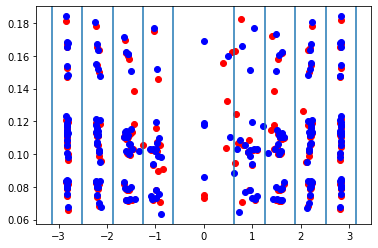

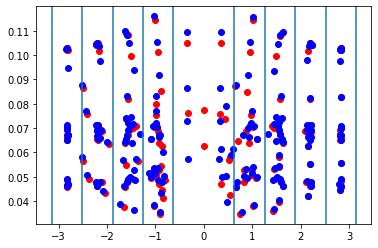

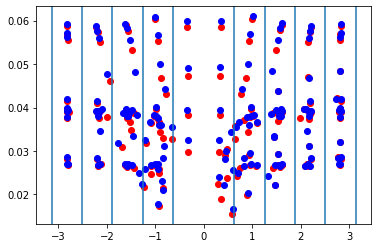

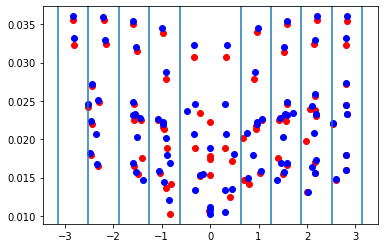

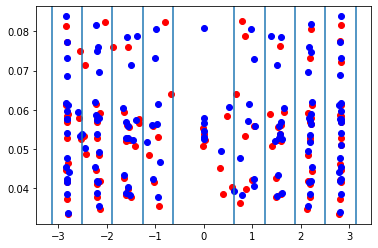

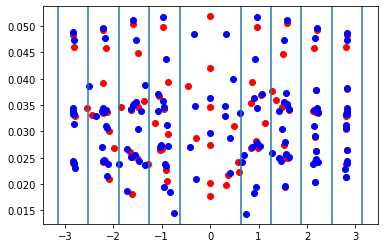

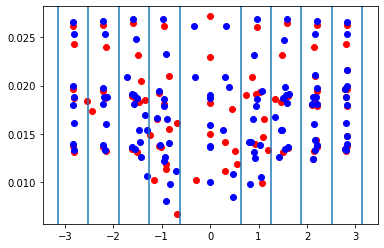

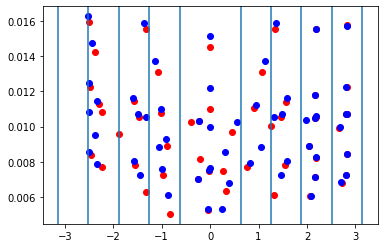

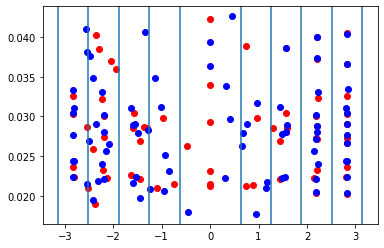

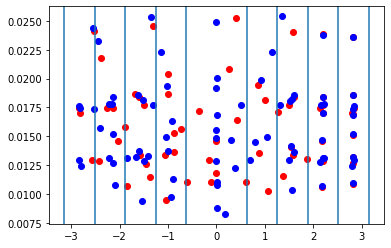

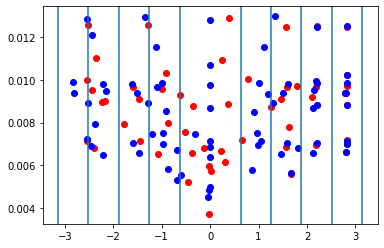

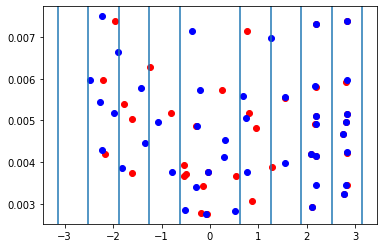

In [7]:

for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_xs_kT8=df_xs_kT8_zQ2[df_xs_kT8_zQ2['z']>z_cuts[i_z-1]][df_xs_kT8_zQ2['z']<z_cuts[i_z]][df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2]]
        df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT4_zQ2['z']<z_cuts[i_z]][df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2]]
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_kT8 = df_xs_kT8['phih'].to_list()
        Fuu_kT8 = df_xs_kT8['value'].to_list()
        phih_kT4 = df_xs_kT4['phih'].to_list()
        Fuu_kT4 = df_xs_kT4['value'].to_list()
        print(len(phih_kT8),len(phih_kT4))
        plt.plot(phih_kT8,np.asarray(Fuu_kT8),'ro')
        plt.plot(phih_kT4,np.asarray(Fuu_kT4),'bo')
        #for i_phi in np.asarray(phihs):
        #    print(i_phi)
        for i_phih in phih_bins:
            plt.axvline(x=i_phih)

rows,cols,row_phi 3 4 9
{}
191 222
-3.141592653589793 -2.5132741228718345
25
z,Q2,phi 0 0 0
-2.5132741228718345 -1.8849555921538759
26
z,Q2,phi 0 0 1
-1.8849555921538759 -1.2566370614359172
26
z,Q2,phi 0 0 2
-1.2566370614359172 -0.6283185307179586
16
z,Q2,phi 0 0 3
-0.6283185307179586 0.6283185307179586
6
z,Q2,phi 0 0 4
0.6283185307179586 1.2566370614359172
15
z,Q2,phi 0 0 5
1.2566370614359172 1.8849555921538759
25
z,Q2,phi 0 0 6
1.8849555921538759 2.5132741228718345
27
z,Q2,phi 0 0 7
2.5132741228718345 3.141592653589793
25
z,Q2,phi 0 0 8
161 189
-3.141592653589793 -2.5132741228718345
12
z,Q2,phi 0 1 0
-2.5132741228718345 -1.8849555921538759
20
z,Q2,phi 0 1 1
-1.8849555921538759 -1.2566370614359172
20
z,Q2,phi 0 1 2
-1.2566370614359172 -0.6283185307179586
23
z,Q2,phi 0 1 3
-0.6283185307179586 0.6283185307179586
11
z,Q2,phi 0 1 4
0.6283185307179586 1.2566370614359172
19
z,Q2,phi 0 1 5
1.2566370614359172 1.8849555921538759
22
z,Q2,phi 0 1 6
1.8849555921538759 2.5132741228718345
18
z,Q2,p

<ipython-input-8-01cde9972516>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8=df_xs_kT8_zQ2[df_xs_kT8_zQ2['z']>z_cuts[i_z-1]][df_xs_kT8_zQ2['z']<z_cuts[i_z]][df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-8-01cde9972516>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT8=df_xs_kT8_zQ2[df_xs_kT8_zQ2['z']>z_cuts[i_z-1]][df_xs_kT8_zQ2['z']<z_cuts[i_z]][df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-8-01cde9972516>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT4_zQ2['z']<z_cuts[i_z]][df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-8-01cde9972516>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_x

 0.6283185307179586
13
z,Q2,phi 1 1 4
0.6283185307179586 1.2566370614359172
9
z,Q2,phi 1 1 5
1.2566370614359172 1.8849555921538759
11
z,Q2,phi 1 1 6
1.8849555921538759 2.5132741228718345
12
z,Q2,phi 1 1 7
2.5132741228718345 3.141592653589793
12
z,Q2,phi 1 1 8
87 111
-3.141592653589793 -2.5132741228718345
7
z,Q2,phi 1 2 0
-2.5132741228718345 -1.8849555921538759
7
z,Q2,phi 1 2 1
-1.8849555921538759 -1.2566370614359172
9
z,Q2,phi 1 2 2
-1.2566370614359172 -0.6283185307179586
14
z,Q2,phi 1 2 3
-0.6283185307179586 0.6283185307179586
10
z,Q2,phi 1 2 4
0.6283185307179586 1.2566370614359172
10
z,Q2,phi 1 2 5
1.2566370614359172 1.8849555921538759
8
z,Q2,phi 1 2 6
1.8849555921538759 2.5132741228718345
11
z,Q2,phi 1 2 7
2.5132741228718345 3.141592653589793
11
z,Q2,phi 1 2 8
54 59
-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
7
z,Q2,phi 1 3 0
-1.8849555921538759 -1.2566370614359172
6
z,Q2,phi 1 3 1
-1.2566370614359172 -0.6283185307179586
5
z,Q2,phi 1 3 2
-0.62831

<ipython-input-8-01cde9972516>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_kT8s = df_xs_kT8[df_xs_kT8['phih']>=i_phi_left][df_xs_kT8['phih']<i_phi]['phih'].tolist()
<ipython-input-8-01cde9972516>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT8s = df_xs_kT8[df_xs_kT8['phih']>=i_phi_left][df_xs_kT8['phih']<i_phi]['value'].tolist()
<ipython-input-8-01cde9972516>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT8_stats = df_xs_kT8[df_xs_kT8['phih']>=i_phi_left][df_xs_kT8['phih']<i_phi]['stat'].tolist()
<ipython-input-8-01cde9972516>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_kT8s = df_xs_kT8[df_xs_kT8['phih']>=i_phi_left][df_xs_kT8['phih']<i_phi]['phih'].tolist()
<ipython-input-8-01cde9972516>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT8s = df_xs_kT8[df_xs_kT8['phih']>=i_phi_left]

2 4
0.6283185307179586 1.2566370614359172
3
z,Q2,phi 2 2 5
1.2566370614359172 1.8849555921538759
7
z,Q2,phi 2 2 6
1.8849555921538759 2.5132741228718345
6
z,Q2,phi 2 2 7
2.5132741228718345 3.141592653589793
8
z,Q2,phi 2 2 8
39 43
-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
3
z,Q2,phi 2 3 0
-1.8849555921538759 -1.2566370614359172
3
z,Q2,phi 2 3 1
-1.2566370614359172 -0.6283185307179586
2
z,Q2,phi 2 3 2
-0.6283185307179586 0.6283185307179586
10
z,Q2,phi 2 3 3
0.6283185307179586 1.2566370614359172
4
z,Q2,phi 2 3 4
1.2566370614359172 1.8849555921538759
2
z,Q2,phi 2 3 5
1.8849555921538759 2.5132741228718345
7
z,Q2,phi 2 3 6
2.5132741228718345 3.141592653589793
8
z,Q2,phi 2 3 7
{(0, 0, 0): -2.82571621013136,
 (0, 0, 1): -2.19719257492391,
 (0, 0, 2): -1.5729396515023735,
 (0, 0, 3): -0.9954485488076513,
 (0, 0, 4): 0.2737672661623288,
 (0, 0, 5): 0.8505599835232271,
 (0, 0, 6): 1.5579955832645347,
 (0, 0, 7): 2.1969998682379694,
 (0, 0, 8): 2.8258525137826

<ipython-input-8-01cde9972516>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_kT8s = df_xs_kT8[df_xs_kT8['phih']>=i_phi_left][df_xs_kT8['phih']<i_phi]['phih'].tolist()
<ipython-input-8-01cde9972516>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT8s = df_xs_kT8[df_xs_kT8['phih']>=i_phi_left][df_xs_kT8['phih']<i_phi]['value'].tolist()
<ipython-input-8-01cde9972516>:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT8_stats = df_xs_kT8[df_xs_kT8['phih']>=i_phi_left][df_xs_kT8['phih']<i_phi]['stat'].tolist()
<ipython-input-8-01cde9972516>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_kT8s = df_xs_kT8[df_xs_kT8['phih']>=i_phi_left][df_xs_kT8['phih']<i_phi]['phih'].tolist()
<ipython-input-8-01cde9972516>:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT8s = df_xs_kT8[df_xs_kT8['phih']>=i_phi_left]

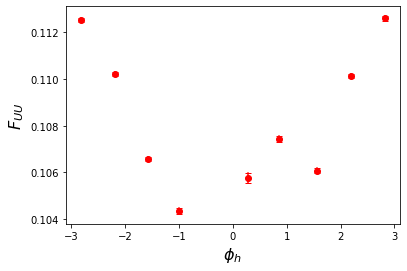

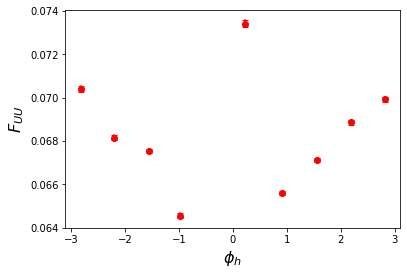

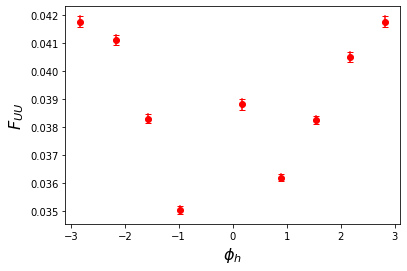

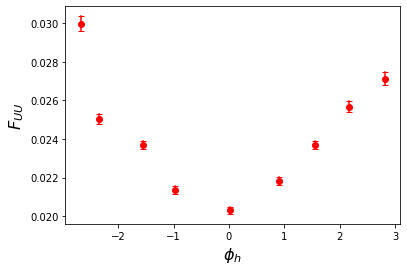

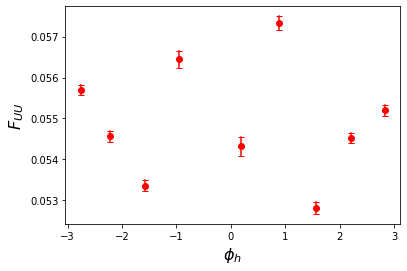

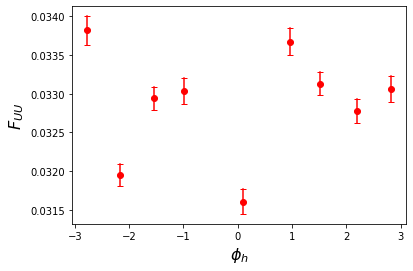

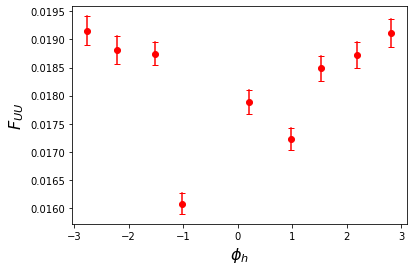

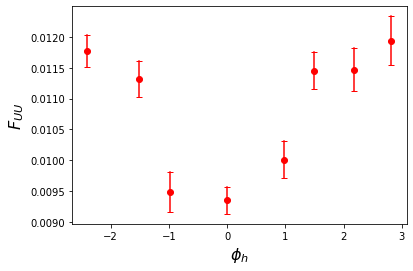

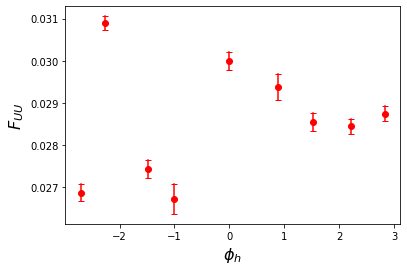

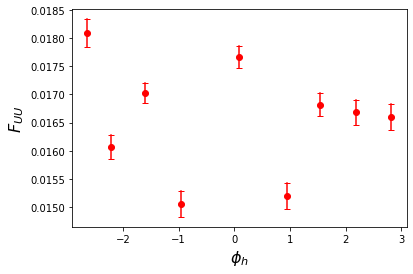

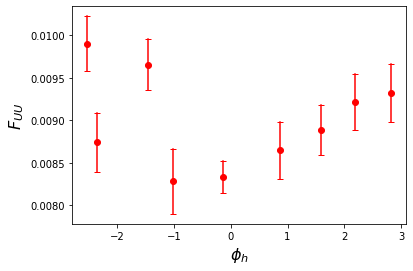

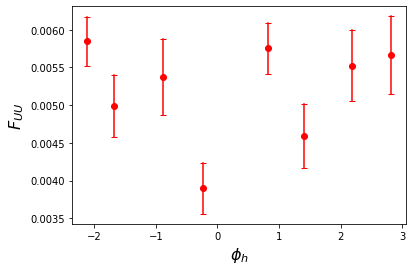

In [8]:
import pprint
rows = len(z_cuts)-1
cols = len(Q2_cuts)-1
row_phi = len(phih_bins)-1

phihs_kT8={}
Fuus_kT8 = {}#[[[0]*rows]*cols]*row_phi
Fuus_err_kT8 = {}#[[[0]*rows]*cols]*row_phi
print('rows,cols,row_phi',rows,cols,row_phi)
pprint.pprint(phihs_kT8)
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_xs_kT8=df_xs_kT8_zQ2[df_xs_kT8_zQ2['z']>z_cuts[i_z-1]][df_xs_kT8_zQ2['z']<z_cuts[i_z]][df_xs_kT8_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT8_zQ2['Q2']<Q2_cuts[i_Q2]]
        df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT4_zQ2['z']<z_cuts[i_z]][df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2]]
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_kT8 = df_xs_kT8['phih'].to_list()
        Fuu_kT8 = df_xs_kT8['value'].to_list()
        phih_kT4 = df_xs_kT4['phih'].to_list()
        Fuu_kT4 = df_xs_kT4['value'].to_list()
        print(len(phih_kT8),len(phih_kT4))
        phih_kT8=[]
        Fuu_kT8=[]
        Fuu_kT8_stat=[]
        Fuu_kT8_sys=[]
        i_phi_left = phih_bins[0]
        i_phi_count = 0
        for i_phi in phih_bins[1:]:
            print(i_phi_left,i_phi)
            phih_kT8s = df_xs_kT8[df_xs_kT8['phih']>=i_phi_left][df_xs_kT8['phih']<i_phi]['phih'].tolist()
            Fuu_kT8s = df_xs_kT8[df_xs_kT8['phih']>=i_phi_left][df_xs_kT8['phih']<i_phi]['value'].tolist()
            Fuu_kT8_stats = df_xs_kT8[df_xs_kT8['phih']>=i_phi_left][df_xs_kT8['phih']<i_phi]['stat'].tolist()
            print(len(phih_kT8s))
    
            if len(phih_kT8s)>0:  
                #print('phih',phih_kT8s)
                #print('Fuu',Fuu_kT8s)
                #print('Fuu_stat',Fuu_kT8_stats)
                _Fuu_kT8 = Get_weighted_average(Fuu_kT8s,Fuu_kT8_stats)[0]
                _Fuu_kT8_stat = Get_weighted_average(Fuu_kT8s,Fuu_kT8_stats)[1]
                _phih_kT8= Get_weighted_average(phih_kT8s,Fuu_kT8_stats)[0]
                #print('_Fuu_kT8',_Fuu_kT8)
                #print('_phih',_phih_kT8)
                #print('_Fuu_stat',_Fuu_kT8_stat)
                Fuu_kT8.append(_Fuu_kT8)
                phih_kT8.append(_phih_kT8)
                Fuu_kT8_stat.append(_Fuu_kT8_stat)
                Fuu_kT8_sys.append(0.05*_Fuu_kT8)
                print('z,Q2,phi',i_z-1,i_Q2-1,i_phi_count)
                phihs_kT8[i_z-1,i_Q2-1,i_phi_count]=(_phih_kT8)
                #pprint.pprint(phihs_kT8)
                Fuus_kT8[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT8)
                Fuus_err_kT8[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT8_stat)
                i_phi_count+=1
                #print(Fuu_kT8,phih_kT8)
                ax.plot([_phih_kT8,_phih_kT8],[_Fuu_kT8-_Fuu_kT8_stat,_Fuu_kT8+_Fuu_kT8_stat],color='red',marker='_')
            i_phi_left = i_phi
        plt.plot(phih_kT8,Fuu_kT8,'ro')
        plt.xlabel('$\phi_h$',fontsize=16)
        plt.ylabel('$F_{UU}$',fontsize=16)
pprint.pprint(phihs_kT8) 

<ipython-input-9-f4486f6bb269>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT4_zQ2['z']<z_cuts[i_z]][df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-9-f4486f6bb269>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT4_zQ2['z']<z_cuts[i_z]][df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-9-f4486f6bb269>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT4_zQ2['z']<z_cuts[i_z]][df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-9-f4486f6bb269>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_x

222 222
-3.141592653589793 -2.5132741228718345
30
-2.5132741228718345 -1.8849555921538759
30
-1.8849555921538759 -1.2566370614359172
30
-1.2566370614359172 -0.6283185307179586
18
-0.6283185307179586 0.6283185307179586
7
0.6283185307179586 1.2566370614359172
20
1.2566370614359172 1.8849555921538759
27
1.8849555921538759 2.5132741228718345
30
2.5132741228718345 3.141592653589793
30
189 189
-3.141592653589793 -2.5132741228718345
15
-2.5132741228718345 -1.8849555921538759
22
-1.8849555921538759 -1.2566370614359172
26
-1.2566370614359172 -0.6283185307179586
24
-0.6283185307179586 0.6283185307179586
15
0.6283185307179586 1.2566370614359172
21
1.2566370614359172 1.8849555921538759
26
1.8849555921538759 2.5132741228718345
21
2.5132741228718345 3.141592653589793
19
157 157
-3.141592653589793 -2.5132741228718345
11
-2.5132741228718345 -1.8849555921538759
14
-1.8849555921538759 -1.2566370614359172
21
-1.2566370614359172 -0.6283185307179586
23
-0.6283185307179586 0.6283185307179586
15
0.6283185307

<ipython-input-9-f4486f6bb269>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT4_stats = df_xs_kT4[df_xs_kT4['phih']>=i_phi_left][df_xs_kT4['phih']<i_phi]['stat'].tolist()
<ipython-input-9-f4486f6bb269>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT4_zQ2['z']<z_cuts[i_z]][df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-9-f4486f6bb269>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT4_zQ2['z']<z_cuts[i_z]][df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-9-f4486f6bb269>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT4_zQ2['z']<z_cuts[i_z]][df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1]

9
-1.8849555921538759 -1.2566370614359172
15
-1.2566370614359172 -0.6283185307179586
14
-0.6283185307179586 0.6283185307179586
14
0.6283185307179586 1.2566370614359172
13
1.2566370614359172 1.8849555921538759
13
1.8849555921538759 2.5132741228718345
13
2.5132741228718345 3.141592653589793
12
59 59
-3.141592653589793 -2.5132741228718345
1
-2.5132741228718345 -1.8849555921538759
7
-1.8849555921538759 -1.2566370614359172
6
-1.2566370614359172 -0.6283185307179586
6
-0.6283185307179586 0.6283185307179586
12
0.6283185307179586 1.2566370614359172
4
1.2566370614359172 1.8849555921538759
6
1.8849555921538759 2.5132741228718345
9
2.5132741228718345 3.141592653589793
8
82 82
-3.141592653589793 -2.5132741228718345
10
-2.5132741228718345 -1.8849555921538759
13
-1.8849555921538759 -1.2566370614359172
9
-1.2566370614359172 -0.6283185307179586
6
-0.6283185307179586 0.6283185307179586
7
0.6283185307179586 1.2566370614359172
7
1.2566370614359172 1.8849555921538759
7
1.8849555921538759 2.5132741228718345

<ipython-input-9-f4486f6bb269>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_kT4s = df_xs_kT4[df_xs_kT4['phih']>=i_phi_left][df_xs_kT4['phih']<i_phi]['phih'].tolist()
<ipython-input-9-f4486f6bb269>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT4s = df_xs_kT4[df_xs_kT4['phih']>=i_phi_left][df_xs_kT4['phih']<i_phi]['value'].tolist()
<ipython-input-9-f4486f6bb269>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT4_stats = df_xs_kT4[df_xs_kT4['phih']>=i_phi_left][df_xs_kT4['phih']<i_phi]['stat'].tolist()
<ipython-input-9-f4486f6bb269>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_kT4s = df_xs_kT4[df_xs_kT4['phih']>=i_phi_left][df_xs_kT4['phih']<i_phi]['phih'].tolist()
<ipython-input-9-f4486f6bb269>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT4s = df_xs_kT4[df_xs_kT4['phih']>=i_phi_left]

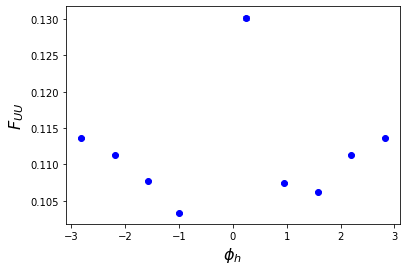

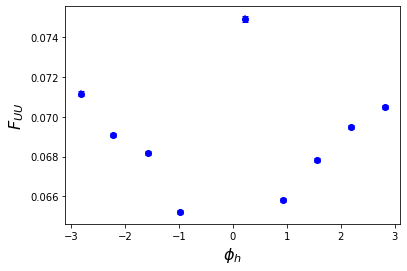

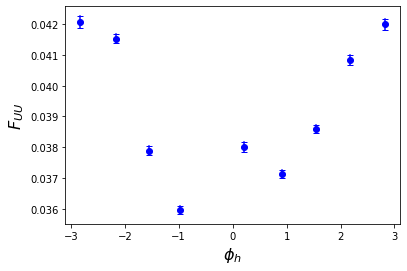

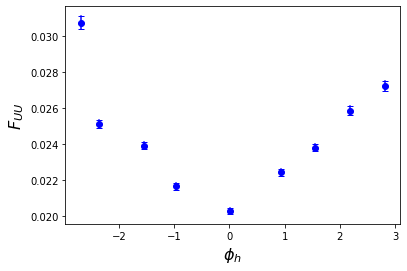

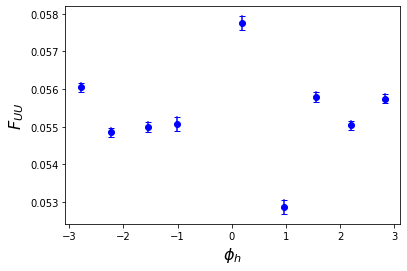

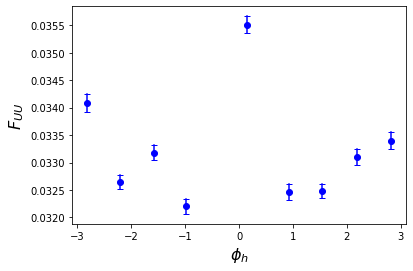

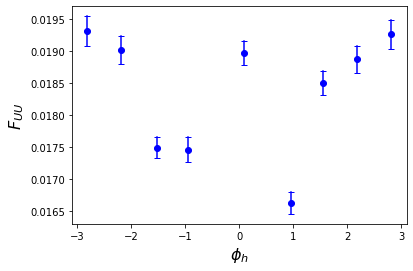

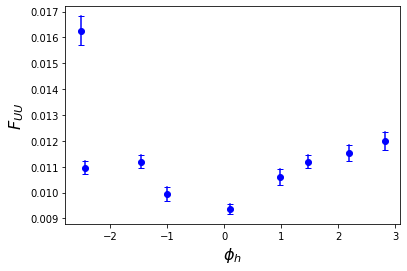

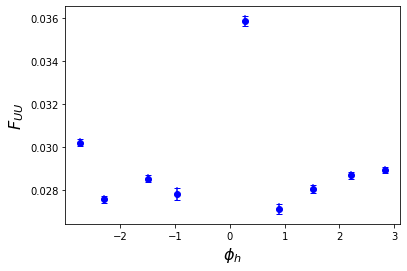

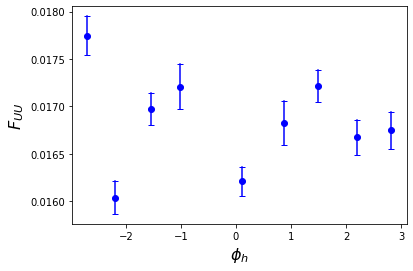

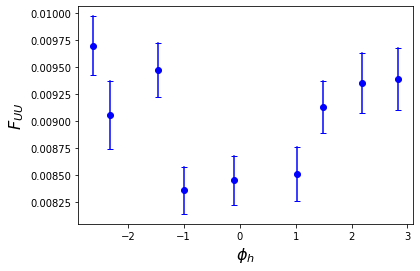

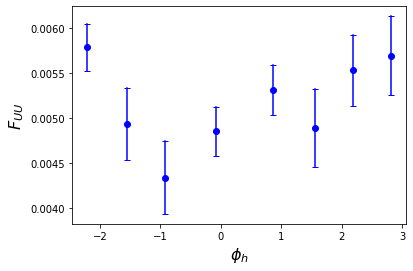

In [9]:
rows = len(z_cuts)-1
cols = len(Q2_cuts)-1
row_phi = len(phih_bins)-1

phihs_kT4 ={}# [[[0]*rows]*cols]*row_phi
Fuus_kT4 = {}#[[[0]*rows]*cols]*row_phi
Fuus_err_kT4 = {}#[[[0]*rows]*cols]*row_phi

for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT4_zQ2['z']<z_cuts[i_z]][df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2]]
        df_xs_kT4=df_xs_kT4_zQ2[df_xs_kT4_zQ2['z']>z_cuts[i_z-1]][df_xs_kT4_zQ2['z']<z_cuts[i_z]][df_xs_kT4_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT4_zQ2['Q2']<Q2_cuts[i_Q2]]
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_kT4 = df_xs_kT4['phih'].to_list()
        Fuu_kT4 = df_xs_kT4['value'].to_list()
        phih_kT4 = df_xs_kT4['phih'].to_list()
        Fuu_kT4 = df_xs_kT4['value'].to_list()
        print(len(phih_kT4),len(phih_kT4))
        phih_kT4=[]
        Fuu_kT4=[]
        Fuu_kT4_stat=[]
        Fuu_kT4_sys=[]
        i_phi_left = phih_bins[0]
        i_phi_count = 0
        for i_phi in phih_bins[1:]:
            print(i_phi_left,i_phi)
            phih_kT4s = df_xs_kT4[df_xs_kT4['phih']>=i_phi_left][df_xs_kT4['phih']<i_phi]['phih'].tolist()
            Fuu_kT4s = df_xs_kT4[df_xs_kT4['phih']>=i_phi_left][df_xs_kT4['phih']<i_phi]['value'].tolist()
            Fuu_kT4_stats = df_xs_kT4[df_xs_kT4['phih']>=i_phi_left][df_xs_kT4['phih']<i_phi]['stat'].tolist()
            print(len(phih_kT4s))
    
            if len(phih_kT4s)>0:  
                #print('phih',phih_kT4s)
                #print('Fuu',Fuu_kT4s)
                #print('Fuu_stat',Fuu_kT4_stats)
                _Fuu_kT4 = Get_weighted_average(Fuu_kT4s,Fuu_kT4_stats)[0]
                _Fuu_kT4_stat = Get_weighted_average(Fuu_kT4s,Fuu_kT4_stats)[1]
                _phih_kT4= Get_weighted_average(phih_kT4s,Fuu_kT4_stats)[0]
                #print('_Fuu_kT4',_Fuu_kT4)
                #print('_phih',_phih_kT4)
                #print('_Fuu_stat',_Fuu_kT4_stat)
                Fuu_kT4.append(_Fuu_kT4)
                phih_kT4.append(_phih_kT4)
                Fuu_kT4_stat.append(_Fuu_kT4_stat)
                Fuu_kT4_sys.append(0.05*_Fuu_kT4)
                phihs_kT4[i_z-1,i_Q2-1,i_phi_count]=(_phih_kT4)
                Fuus_kT4[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT4)
                Fuus_err_kT4[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT4_stat)
                i_phi_count+=1
                #print(Fuu_kT4,phih_kT4)
                ax.plot([_phih_kT4,_phih_kT4],[_Fuu_kT4-_Fuu_kT4_stat,_Fuu_kT4+_Fuu_kT4_stat],color='blue',marker='_')
            i_phi_left = i_phi
        plt.plot(phih_kT4,Fuu_kT4,'bo')
        plt.xlabel('$\phi_h$',fontsize=16)
        plt.ylabel('$F_{UU}$',fontsize=16)
pprint.pprint(phihs_kT4)        

<ipython-input-10-454093f0841b>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT6=df_xs_kT6_zQ2[df_xs_kT6_zQ2['z']>z_cuts[i_z-1]][df_xs_kT6_zQ2['z']<z_cuts[i_z]][df_xs_kT6_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT6_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-10-454093f0841b>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT6=df_xs_kT6_zQ2[df_xs_kT6_zQ2['z']>z_cuts[i_z-1]][df_xs_kT6_zQ2['z']<z_cuts[i_z]][df_xs_kT6_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT6_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-10-454093f0841b>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT6=df_xs_kT6_zQ2[df_xs_kT6_zQ2['z']>z_cuts[i_z-1]][df_xs_kT6_zQ2['z']<z_cuts[i_z]][df_xs_kT6_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT6_zQ2['Q2']<Q2_cuts[i_Q2]]
<ipython-input-10-454093f0841b>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_xs_kT6=df_xs_kT6_zQ2[df_xs_kT6_zQ2['z']>z_cuts[i_z-1]][

155 155
-3.141592653589793 -2.5132741228718345
20
-2.5132741228718345 -1.8849555921538759
22
-1.8849555921538759 -1.2566370614359172
20
-1.2566370614359172 -0.6283185307179586
14
-0.6283185307179586 0.6283185307179586
4
0.6283185307179586 1.2566370614359172
13
1.2566370614359172 1.8849555921538759
20
1.8849555921538759 2.5132741228718345
22
2.5132741228718345 3.141592653589793
20
125 125
-3.141592653589793 -2.5132741228718345
10
-2.5132741228718345 -1.8849555921538759
16
-1.8849555921538759 -1.2566370614359172
15
-1.2566370614359172 -0.6283185307179586
16
-0.6283185307179586 0.6283185307179586
9
0.6283185307179586 1.2566370614359172
15
1.2566370614359172 1.8849555921538759
15
1.8849555921538759 2.5132741228718345
15
2.5132741228718345 3.141592653589793
14
112 112
-3.141592653589793 -2.5132741228718345
8
-2.5132741228718345 -1.8849555921538759
9
-1.8849555921538759 -1.2566370614359172
13
-1.2566370614359172 -0.6283185307179586
17
-0.6283185307179586 0.6283185307179586
15
0.6283185307179

<ipython-input-10-454093f0841b>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_kT6s = df_xs_kT6[df_xs_kT6['phih']>=i_phi_left][df_xs_kT6['phih']<i_phi]['phih'].tolist()
<ipython-input-10-454093f0841b>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT6s = df_xs_kT6[df_xs_kT6['phih']>=i_phi_left][df_xs_kT6['phih']<i_phi]['value'].tolist()
<ipython-input-10-454093f0841b>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT6_stats = df_xs_kT6[df_xs_kT6['phih']>=i_phi_left][df_xs_kT6['phih']<i_phi]['stat'].tolist()
<ipython-input-10-454093f0841b>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_kT6s = df_xs_kT6[df_xs_kT6['phih']>=i_phi_left][df_xs_kT6['phih']<i_phi]['phih'].tolist()
<ipython-input-10-454093f0841b>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT6s = df_xs_kT6[df_xs_kT6['phih']>=i_phi_

 33
-3.141592653589793 -2.5132741228718345
0
-2.5132741228718345 -1.8849555921538759
2
-1.8849555921538759 -1.2566370614359172
3
-1.2566370614359172 -0.6283185307179586
2
-0.6283185307179586 0.6283185307179586
8
0.6283185307179586 1.2566370614359172
4
1.2566370614359172 1.8849555921538759
1
1.8849555921538759 2.5132741228718345
5
2.5132741228718345 3.141592653589793
8
{(0, 0, 0): -2.809018018640602,
 (0, 0, 1): -2.212329534720379,
 (0, 0, 2): -1.569310720870687,
 (0, 0, 3): -0.9710827725740784,
 (0, 0, 4): 0.17080237527124192,
 (0, 0, 5): 0.8754172888729475,
 (0, 0, 6): 1.5711201006256217,
 (0, 0, 7): 2.197064046518783,
 (0, 0, 8): 2.8258317380372184,
 (0, 1, 0): -2.8242699580940624,
 (0, 1, 1): -2.1796945485745702,
 (0, 1, 2): -1.5603250201587053,
 (0, 1, 3): -0.9832661118515762,
 (0, 1, 4): 0.1022758302929046,
 (0, 1, 5): 0.9276981431879529,
 (0, 1, 6): 1.5400703898814798,
 (0, 1, 7): 2.1875917731647947,
 (0, 1, 8): 2.823043889228337,
 (0, 2, 0): -2.8212302653236643,
 (0, 2, 1): -2.1

<ipython-input-10-454093f0841b>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_kT6s = df_xs_kT6[df_xs_kT6['phih']>=i_phi_left][df_xs_kT6['phih']<i_phi]['phih'].tolist()
<ipython-input-10-454093f0841b>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT6s = df_xs_kT6[df_xs_kT6['phih']>=i_phi_left][df_xs_kT6['phih']<i_phi]['value'].tolist()
<ipython-input-10-454093f0841b>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT6_stats = df_xs_kT6[df_xs_kT6['phih']>=i_phi_left][df_xs_kT6['phih']<i_phi]['stat'].tolist()
<ipython-input-10-454093f0841b>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phih_kT6s = df_xs_kT6[df_xs_kT6['phih']>=i_phi_left][df_xs_kT6['phih']<i_phi]['phih'].tolist()
<ipython-input-10-454093f0841b>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Fuu_kT6s = df_xs_kT6[df_xs_kT6['phih']>=i_phi_

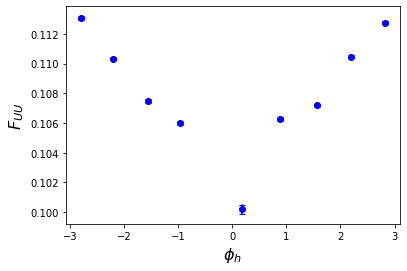

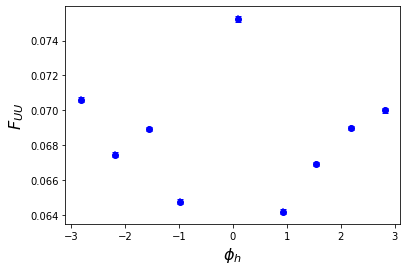

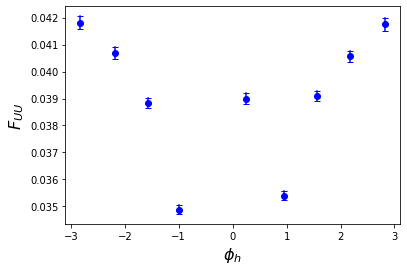

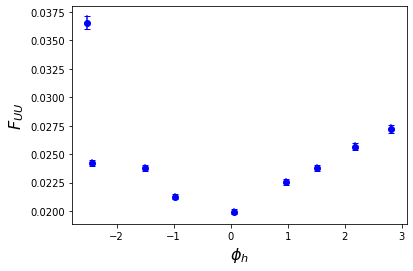

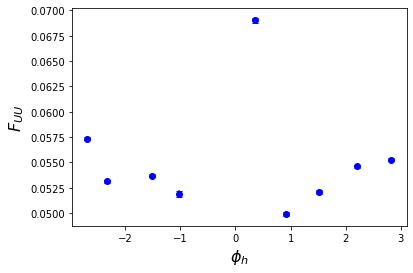

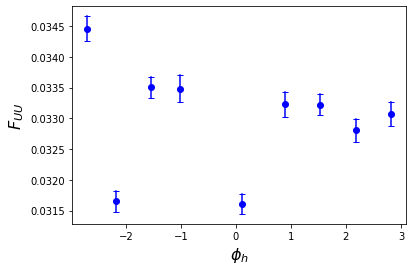

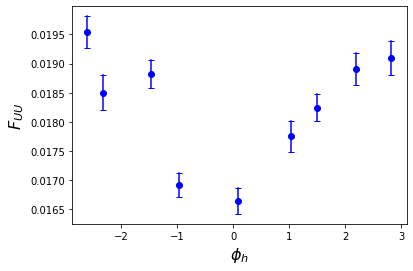

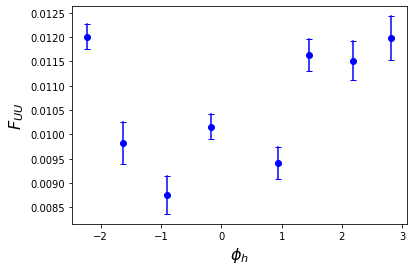

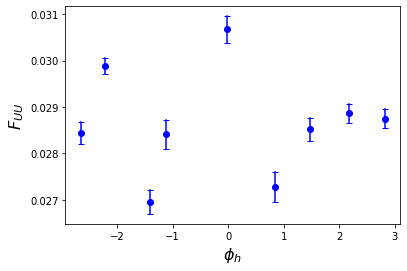

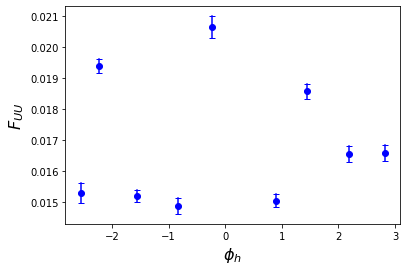

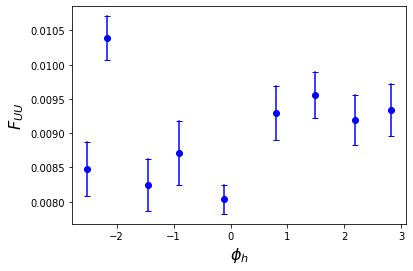

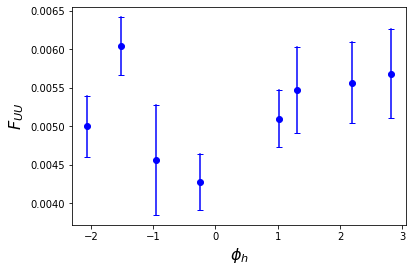

In [10]:
rows = len(z_cuts)-1
cols = len(Q2_cuts)-1
row_phi = len(phih_bins)-1

phihs_kT6 ={}# [[[0]*rows]*cols]*row_phi
Fuus_kT6 = {}#[[[0]*rows]*cols]*row_phi
Fuus_err_kT6 = {}#[[[0]*rows]*cols]*row_phi

for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        df_xs_kT6=df_xs_kT6_zQ2[df_xs_kT6_zQ2['z']>z_cuts[i_z-1]][df_xs_kT6_zQ2['z']<z_cuts[i_z]][df_xs_kT6_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT6_zQ2['Q2']<Q2_cuts[i_Q2]]
        df_xs_kT6=df_xs_kT6_zQ2[df_xs_kT6_zQ2['z']>z_cuts[i_z-1]][df_xs_kT6_zQ2['z']<z_cuts[i_z]][df_xs_kT6_zQ2['Q2']>Q2_cuts[i_Q2-1]][df_xs_kT6_zQ2['Q2']<Q2_cuts[i_Q2]]
        fig = plt.figure()
        ax = fig.add_subplot()
        phih_kT6 = df_xs_kT6['phih'].to_list()
        Fuu_kT6 = df_xs_kT6['value'].to_list()
        phih_kT6 = df_xs_kT6['phih'].to_list()
        Fuu_kT6 = df_xs_kT6['value'].to_list()
        print(len(phih_kT6),len(phih_kT6))
        phih_kT6=[]
        Fuu_kT6=[]
        Fuu_kT6_stat=[]
        Fuu_kT6_sys=[]
        i_phi_left = phih_bins[0]
        i_phi_count = 0
        for i_phi in phih_bins[1:]:
            print(i_phi_left,i_phi)
            phih_kT6s = df_xs_kT6[df_xs_kT6['phih']>=i_phi_left][df_xs_kT6['phih']<i_phi]['phih'].tolist()
            Fuu_kT6s = df_xs_kT6[df_xs_kT6['phih']>=i_phi_left][df_xs_kT6['phih']<i_phi]['value'].tolist()
            Fuu_kT6_stats = df_xs_kT6[df_xs_kT6['phih']>=i_phi_left][df_xs_kT6['phih']<i_phi]['stat'].tolist()
            print(len(phih_kT6s))
    
            if len(phih_kT6s)>0:  
                #print('phih',phih_kT6s)
                #print('Fuu',Fuu_kT6s)
                #print('Fuu_stat',Fuu_kT6_stats)
                _Fuu_kT6 = Get_weighted_average(Fuu_kT6s,Fuu_kT6_stats)[0]
                _Fuu_kT6_stat = Get_weighted_average(Fuu_kT6s,Fuu_kT6_stats)[1]
                _phih_kT6= Get_weighted_average(phih_kT6s,Fuu_kT6_stats)[0]
                #print('_Fuu_kT6',_Fuu_kT6)
                #print('_phih',_phih_kT6)
                #print('_Fuu_stat',_Fuu_kT6_stat)
                Fuu_kT6.append(_Fuu_kT6)
                phih_kT6.append(_phih_kT6)
                Fuu_kT6_stat.append(_Fuu_kT6_stat)
                Fuu_kT6_sys.append(0.05*_Fuu_kT6)
                phihs_kT6[i_z-1,i_Q2-1,i_phi_count]=(_phih_kT6)
                Fuus_kT6[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT6)
                Fuus_err_kT6[i_z-1,i_Q2-1,i_phi_count]=(_Fuu_kT6_stat)
                i_phi_count+=1
                #print(Fuu_kT6,phih_kT6)
                ax.plot([_phih_kT6,_phih_kT6],[_Fuu_kT6-_Fuu_kT6_stat,_Fuu_kT6+_Fuu_kT6_stat],color='blue',marker='_')
            i_phi_left = i_phi
        plt.plot(phih_kT6,Fuu_kT6,'bo')
        plt.xlabel('$\phi_h$',fontsize=16)
        plt.ylabel('$F_{UU}$',fontsize=16)
pprint.pprint(phihs_kT6)        

no data here i_z,i_Q2,i_phi 2 4 8
no data here i_z,i_Q2,i_phi 3 4 8


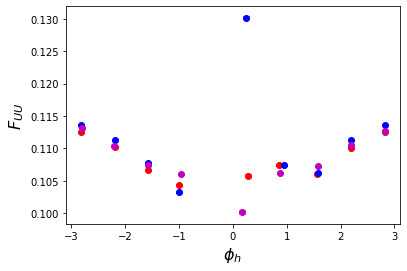

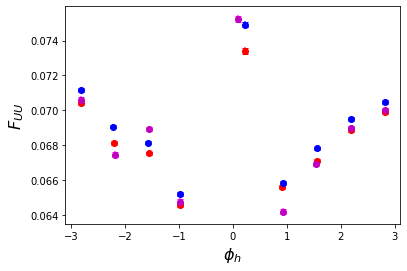

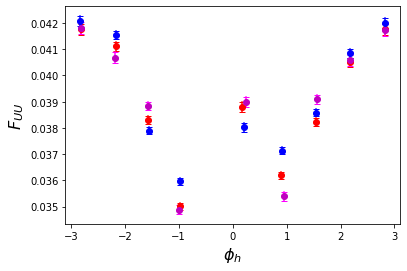

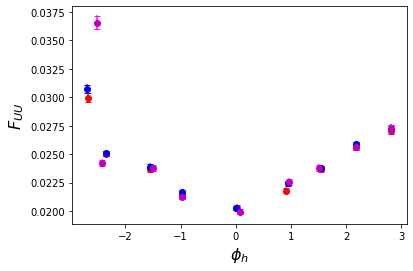

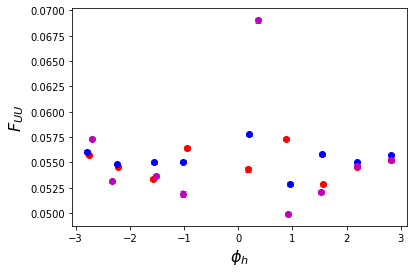

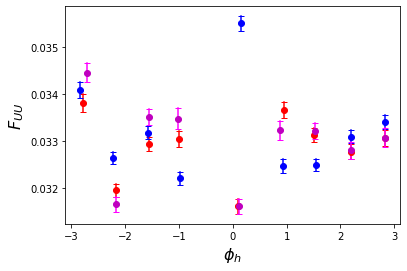

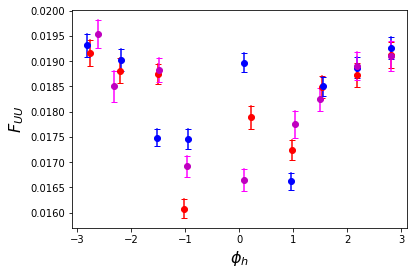

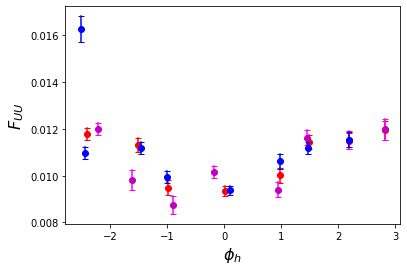

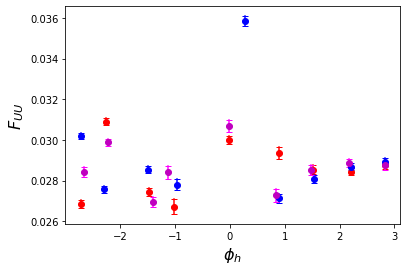

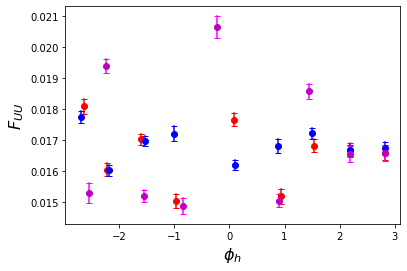

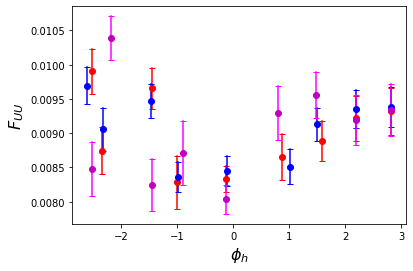

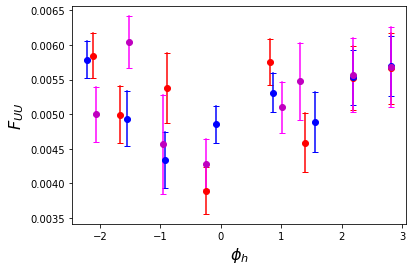

In [11]:
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        fig = plt.figure()
        ax = fig.add_subplot()
        for i_phi in range(0,len(phih_bins)-1):
            
            try:
                
                Fuu_kT8 = Fuus_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT8 = Fuus_err_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_kT4 = Fuus_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT4 = Fuus_err_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_kT6 = Fuus_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT6 = Fuus_err_kT6[i_z-1,i_Q2-1,i_phi]
                #print(phihs_kT4[i_z-1,i_Q2-1,i_phi])
                ax.plot([phihs_kT8[i_z-1,i_Q2-1,i_phi],phihs_kT8[i_z-1,i_Q2-1,i_phi]],[Fuu_kT8-Fuu_err_kT8,Fuu_kT8+Fuu_err_kT8],color='red',marker='_')
                ax.plot([phihs_kT4[i_z-1,i_Q2-1,i_phi],phihs_kT4[i_z-1,i_Q2-1,i_phi]],[Fuu_kT4-Fuu_err_kT4,Fuu_kT4+Fuu_err_kT4],color='blue',marker='_')
                ax.plot([phihs_kT6[i_z-1,i_Q2-1,i_phi],phihs_kT6[i_z-1,i_Q2-1,i_phi]],[Fuu_kT6-Fuu_err_kT6,Fuu_kT6+Fuu_err_kT6],color='magenta',marker='_')
                plt.plot(phihs_kT8[i_z-1,i_Q2-1,i_phi],Fuus_kT8[i_z-1,i_Q2-1,i_phi],'ro',label='kT=0.804')
                plt.plot(phihs_kT4[i_z-1,i_Q2-1,i_phi],Fuus_kT4[i_z-1,i_Q2-1,i_phi],'bo',label='kT=0.404')
                plt.plot(phihs_kT6[i_z-1,i_Q2-1,i_phi],Fuus_kT6[i_z-1,i_Q2-1,i_phi],'mo',label='kT=0.604')
            except KeyError:
                print('no data here i_z,i_Q2,i_phi',i_z,i_Q2,i_phi)
        plt.xlabel('$\phi_h$',fontsize=16)
        plt.ylabel('$F_{UU}$',fontsize=16)


no data here i_z,i_Q2,i_phi 2 4 8
no data here i_z,i_Q2,i_phi 3 4 8


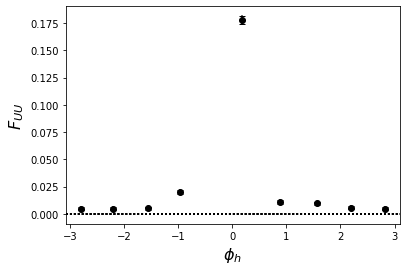

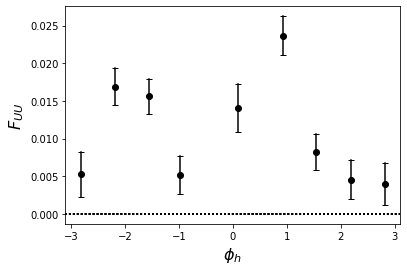

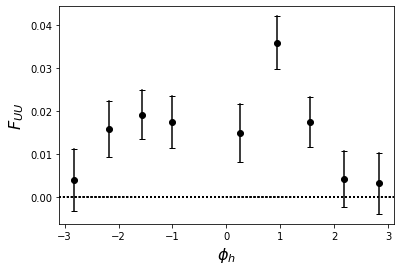

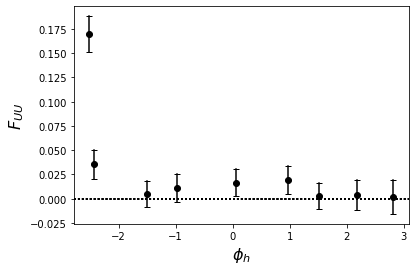

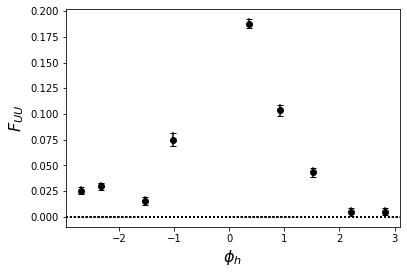

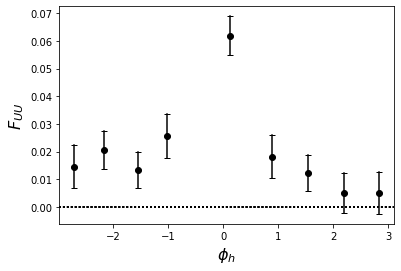

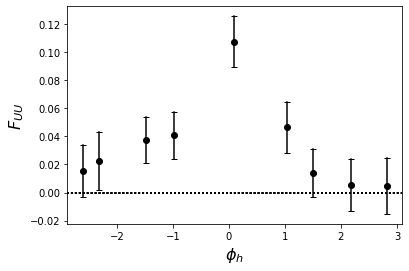

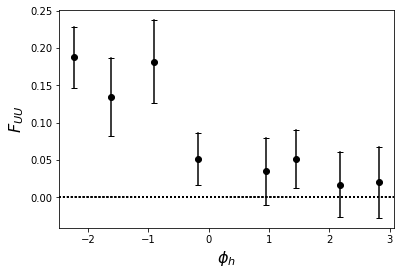

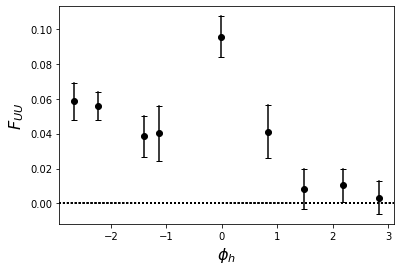

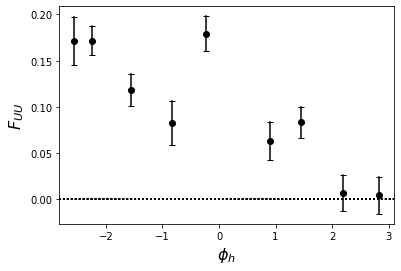

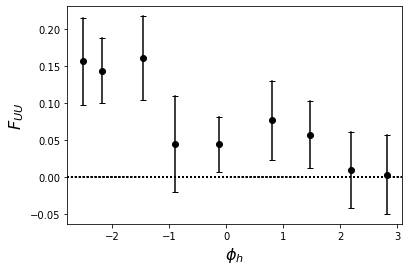

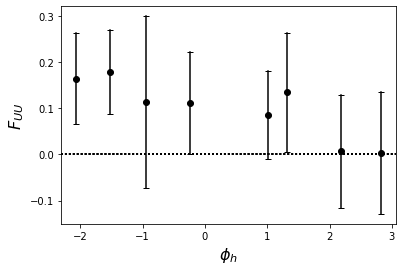

In [12]:
for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):
        fig = plt.figure()
        ax = fig.add_subplot()
        for i_phi in range(0,len(phih_bins)-1):
            
            try:
                
                phih = phihs_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_kT8 = Fuus_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT8 = Fuus_err_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_kT4 = Fuus_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT4 = Fuus_err_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_kT6 = Fuus_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT6 = Fuus_err_kT6[i_z-1,i_Q2-1,i_phi]
                _Fuu_ratio,_Fuu_ratio_err = Get_ratio_error(Fuu_kT8,Fuu_err_kT8,Fuu_kT6,Fuu_err_kT6)
                _Fuu_ratio2,_Fuu_ratio2_err = Get_ratio_error(Fuu_kT4,Fuu_err_kT4,Fuu_kT6,Fuu_err_kT6)
                Fuu_ratio = (_Fuu_ratio+_Fuu_ratio2)/2
                Fuu_ratio_err = (_Fuu_ratio_err+_Fuu_ratio2_err)/2
                
                ax.plot([phih,phih],[Fuu_ratio-Fuu_ratio_err,Fuu_ratio+Fuu_ratio_err],color='black',marker='_')
                plt.plot(phih,Fuu_ratio,'ko')
                plt.axhline(0,color = 'black',linestyle = ':')
                #plt.plot(phihs_kT4[i_z-1,i_Q2-1,i_phi],Fuus_kT4[i_z-1,i_Q2-1,i_phi],'bo',label='kT=0.404')
            except KeyError:
                print('no data here i_z,i_Q2,i_phi',i_z,i_Q2,i_phi)
        plt.xlabel('$\phi_h$',fontsize=16)
        plt.ylabel('$F_{UU}$',fontsize=16)


no data here i_z,i_Q2,i_phi 2 4 8
no data here i_z,i_Q2,i_phi 3 4 8


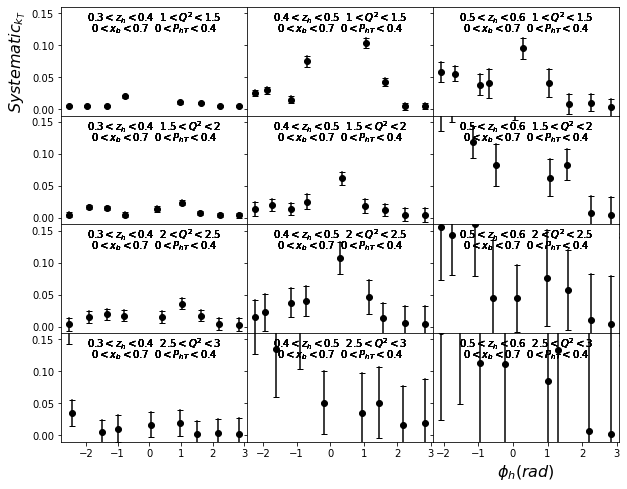

In [13]:
fig, axs = plt.subplots(4,3,figsize=(10,8),sharey=True)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
#plt.ylabel('Ratio',fontsize=16)
plt.xlabel('$\phi_h(rad)$',fontsize=16)

for i_z in range(1,len(z_cuts)):
    for i_Q2 in range(1,len(Q2_cuts)):

        for i_phi in range(0,len(phih_bins)-1):
            
            try:
                #print(phihs_kT4[i_z-1,i_Q2-1,i_phi])
                phih = phihs_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_kT8 = Fuus_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT8 = Fuus_err_kT8[i_z-1,i_Q2-1,i_phi]
                Fuu_kT4 = Fuus_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT4 = Fuus_err_kT4[i_z-1,i_Q2-1,i_phi]
                Fuu_kT6 = Fuus_kT6[i_z-1,i_Q2-1,i_phi]
                Fuu_err_kT6 = Fuus_err_kT6[i_z-1,i_Q2-1,i_phi]
                _Fuu_ratio,_Fuu_ratio_err = Get_ratio_error(Fuu_kT8,Fuu_err_kT8,Fuu_kT6,Fuu_err_kT6)
                _Fuu_ratio2,_Fuu_ratio2_err = Get_ratio_error(Fuu_kT4,Fuu_err_kT4,Fuu_kT6,Fuu_err_kT6)
                Fuu_ratio = (_Fuu_ratio+_Fuu_ratio2)/2
                Fuu_ratio_err = math.sqrt(_Fuu_ratio_err**2+_Fuu_ratio2_err**2)
                axs[i_Q2-1][i_z-1].plot([phih,phih],[Fuu_ratio-Fuu_ratio_err,Fuu_ratio+Fuu_ratio_err],color='black',marker='_')
                axs[i_Q2-1][i_z-1].plot(phih,Fuu_ratio,'ko')
                #axs[i_Q2-1][i_z-1].axhline(1,color = 'black',linestyle = ':')
                axs[i_Q2-1][i_z-1].text(0.5,0.9,r'${}<z_h<{}\ \ {}<Q^2<{}$'.format(z_cuts[i_z-1],z_cuts[i_z],Q2_cuts[i_Q2-1],Q2_cuts[i_Q2]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
                axs[i_Q2-1][i_z-1].text(0.5,0.8,r'${}<x_{{b}}<{}\ \ {}<P_{{hT}}<{}$'.format(xbj_cuts[0],xbj_cuts[1],PhT_cuts[0],PhT_cuts[1]), horizontalalignment='center', verticalalignment='center', transform=axs[i_Q2-1][i_z-1].transAxes)
            except KeyError:
                print('no data here i_z,i_Q2,i_phi',i_z,i_Q2,i_phi)
                

        #axs[i_Q2-1][i_z-1].set_xlabel('$\phi_h$',fontsize=16)
        #axs[i_Q2-1][i_z-1].set_ylabel('$F_{UU}$',fontsize=16)
        #axs[i_Q2-1][i_z-1].set_ylim(0.7,1.3)
        #axs[i_Q2-1][i_z-1].set_ylim(0.85,1.15)
        axs[i_Q2-1][i_z-1].set_ylim(-0.01,0.16)
axs[0][0].set_ylabel('$Systematic_{k_T}$',fontsize=16)
plt.savefig('../Unpol_proposal/Materials/results_sys/Systemaic_from_kT.pdf')